# Tabular Playground Series - Jul 2022

For this challenge, you are given (simulated) manufacturing control data that can be clustered into different control states. Your task is to cluster the data into these control states. You are not given any training data, and you are not told how many possible control states there are. This is a completely unsupervised problem, one you might encounter in a real-world setting.



Submissions are evaluated on the Adjusted Rand Index between the ground truth cluster labels of the data and your predicted cluster labels. You are not given the number of ground truth clusters or any training labels. This is a completely unsupervised problem

https://en.wikipedia.org/wiki/Rand_index

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [ ]:
df_submussion = pd.read_csv('/content/drive/MyDrive/projects/kaggle/tabular_playground_series_jul_2022/sample_submission.csv')
# df_submussion = pd.read_csv('sample_submission.csv')

In [ ]:
df_submussion.head()

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projects/kaggle/tabular_playground_series_jul_2022/data.csv')
# df = pd.read_csv('data.csv')

In [ ]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [ ]:
df = df[['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07']]

## EDA

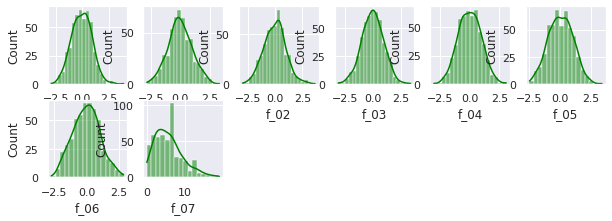

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
for i, column in enumerate(list(df.columns), 1):
    plt.subplot(6,6,i)
    p = sns.histplot(x = column, data = df.sample(500), stat = 'count', kde=True, color='green')

In [ ]:
distortion = []
K = range(1, 20)

for k in K:
  model = KMeans(n_clusters=k, random_state=12345)
  model.fit(df)
  distortion.append(model.inertia_)


plt.figure(figsize=(5, 5))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show() 

## PowerTransformer

In [ ]:
scaled_data = pd.DataFrame(PowerTransformer().fit_transform(df))

scaled_data.columns = df.columns

In [ ]:
scaled_data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07
0,-0.389230,-0.917652,0.647948,0.590717,-0.824836,0.734685,2.259470,-0.977987
1,-0.688368,-0.458647,0.653182,0.995359,-1.644030,0.864898,-0.085604,-0.977987
2,0.805709,0.319397,-1.166935,-0.622421,0.108371,0.785018,1.990489,0.021718
3,-0.500469,0.223997,0.262677,0.234061,0.417047,-1.218768,0.144455,0.286548
4,-0.670427,-1.044482,-0.270854,-1.833338,-0.285955,-1.849243,0.787627,0.756900


## KMeans

In [ ]:
model_km = KMeans(n_clusters=7, random_state=0)
preds_km = model_km.fit_predict(scaled_data)

Text(0.5, 1.0, 'Predicted clusters')

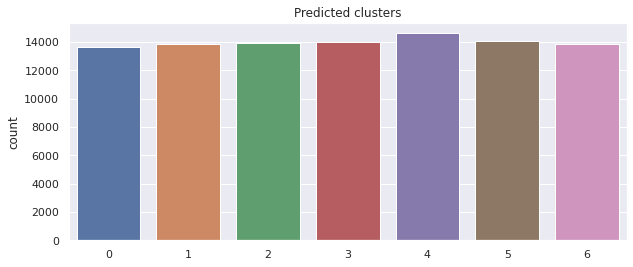

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x=preds_km)
plt.title('Predicted clusters')

In [ ]:
preds_km

array([5, 6, 5, 3, 3, 3, 2, 5, 2, 6, 2, 1, 4, 6, 3, 4, 3, 6, 0, 3, 5, 0,
       2, 6, 6, 1, 1, 2, 5, 0, 5, 4, 4, 3, 4, 0, 5, 5, 3, 6, 5, 6, 4, 3,
       5, 2, 1, 3, 5, 3], dtype=int32)

In [ ]:
model_km.labels_.astype(str)

array(['5', '6', '5', '3', '3', '3', '2', '5', '2', '6', '2', '1', '4',
       '6', '3', '4', '3', '6', '0', '3', '5', '0', '2', '6', '6', '1',
       '1', '2', '5', '0', '5', '4', '4', '3', '4', '0', '5', '5', '3',
       '6', '5', '6', '4', '3', '5', '2', '1', '3', '5', '3'],
      dtype='<U11')

In [ ]:
scaled_data_km = scaled_data.copy()

In [ ]:
scaled_data_km['label'] = model_km.labels_.astype(str)

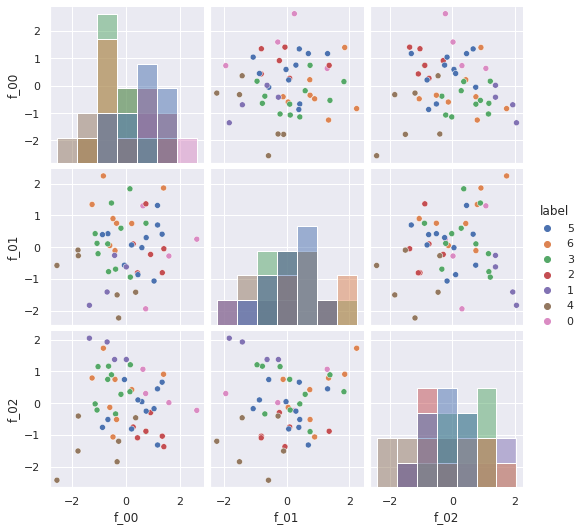

In [ ]:
sns.pairplot(scaled_data_km[['f_00', 'f_01', 'f_02', 'label']], 
             hue='label', vars=scaled_data_km[['f_00', 'f_01', 'f_02', 'label']].columns[:-1], 
             diag_kind='hist')

In [ ]:
# df_submussion_km = df_submussion.copy()
# df_submussion_km = df_submussion_km['Id']
# df_submussion_km['Predicted'] = list(preds_km)
# df_submussion_km.to_csv('submussion.csv', index=False)
# df_submussion_km.head()

In [ ]:
# 0.26468

## GaussianMixture

In [ ]:
model_gmm = GaussianMixture(n_components=7, random_state=0)
preds_gmm = model_gmm.fit_predict(scaled_data)

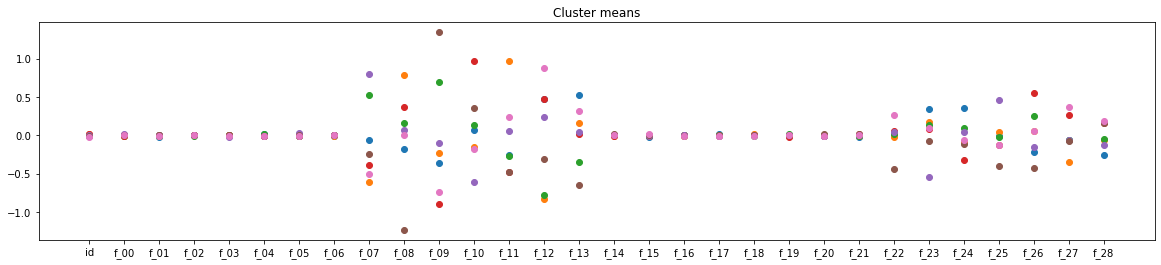

In [ ]:
plt.figure(figsize=(20,4))
for i in range(model_gmm.means_.shape[0]):
    plt.scatter(np.arange(scaled_data.shape[1]), model_gmm.means_[i])
plt.xticks(ticks=np.arange(scaled_data.shape[1]), labels=scaled_data.columns)
plt.title('Cluster means')
plt.show()

In [ ]:
# Drop useless features
drop_feats = [f'f_0{i}' for i in range(7)]
drop_feats = drop_feats + [f'f_{i}' for i in range(14,22)]
scaled_data_crop = scaled_data.drop(drop_feats, axis=1)

# Remake predictions
model_gmm_crop = GaussianMixture(n_components = 7, random_state=0)
preds_gmm_crop = model_gmm_crop.fit_predict(scaled_data_crop)

## BayesianGaussianMixture

In [ ]:
model_bgmm = BayesianGaussianMixture(n_components=7, covariance_type='full', 
                                     max_iter=100, n_init=5, 
                                     init_params='random', random_state=0)
preds_bgmm = model_bgmm.fit_predict(scaled_data_crop)

Text(0.5, 1.0, 'Predicted clusters')

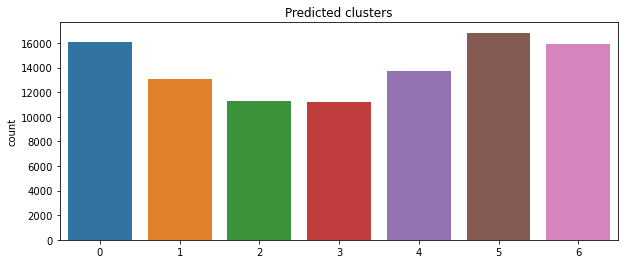

In [ ]:
# Countplot
plt.figure(figsize=(10,4))
sns.countplot(x=preds_bgmm)
plt.title('Predicted clusters')

In [ ]:
# sub = pd.read_csv('sample_submission.csv')
# sub['Predicted'] = preds_bgmm
# sub.to_csv('submission.csv', index=False)

In [ ]:
# 0.60098